# Unsupervised Learning Predict (Team_JM1_#Awesome) Solution

© Explore Data Science Academy

---
### Honour Code

We { **MICHAEL OKEREAFOR, AYOOLA SOLANKE, RAHEEMAT ADETUNJI** }, confirm - by submitting this document - that the solutions in this notebook are a result of our own work and that we abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

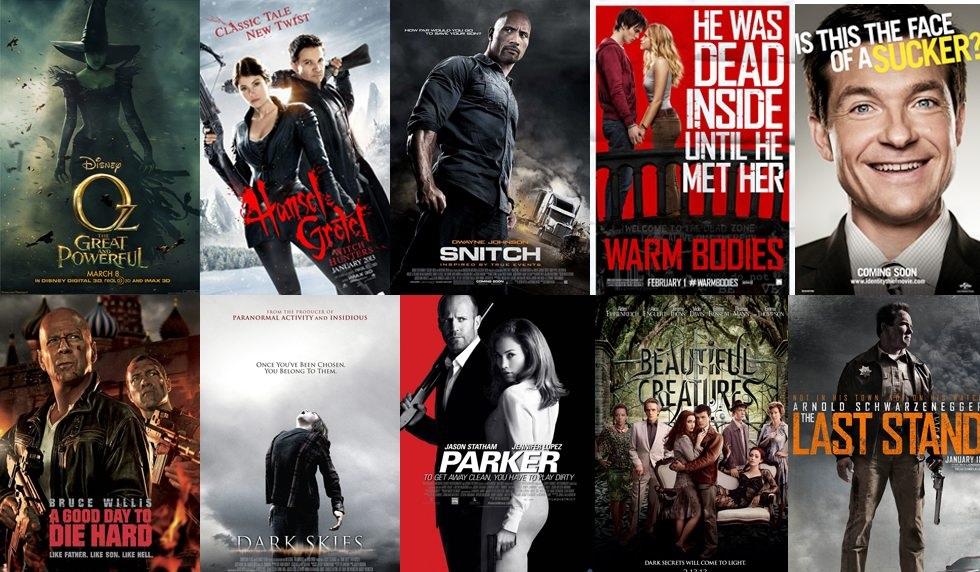

## Predict Overview: Movie Recommendation System 2022

In today’s technology driven world, recommender systems are socially and economically critical to ensure that individuals can make optimised choices surrounding the content they engage with on a daily basis. One application where this is especially true is movie recommendations; where intelligent algorithms can help viewers find great titles from tens of thousands of options.

EDSA is challenging us during this Unsupervised Learning Sprint with the following tasks; 

- construct a recommendation algorithm based on content or collaborative filtering, capable of accurately predicting how a user will rate a movie they have not yet viewed, based on their historical preferences.

Providing an accurate and robust solution to this challenge has immense economic potential, with users of the system being personalised recommendations - generating platform affinity for the streaming services which best facilitates their audience's viewing.


Recommender Systems are a type of information filtering system as they improve the quality of search results and provides items that are more relevant to the search item or are related to the search history of the user.  

Almost every major tech company has applied recommender systems in some form: Amazon uses it to suggest products to customers, YouTube uses it to decide which video to play next on autoplay and Facebook uses it to recommend pages to like and people to follow. Furthermore, companies like Netflix and Spotify depend on the effectiveness of their recommendation engines for the success of their business.

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>     

<a href=#eight>8. Conclusion</a>

## Problem statement
Thousands of movies are produced and released every year by different countries.      
Many viewers find it tedious to inspect or select great movies that suits their preference from these numerous released movies; therefore, majority of these movies are left unexplored. 

Following consultation, we(*Awesome DataScientists*) agreed to construct an algorithm that will accurately rate and recommend unseen movies for movie lovers based on their historical choices.

In [1]:
import os
os.environ["COMET_URL_OVERRIDE"] = "https://www.comet.com/clientlib/"

from comet_ml import Experiment

In [2]:
experiment = Experiment(
    api_key="ROjbHRdIYvME1efnooXTYhCeg",
    project_name="unsupervised-learning-predict-project",
    workspace="chuqudee",
)

COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.ml https://www.comet.com/chuqudee/unsupervised-learning-predict-project/283aa2d2fcea4391b74ebd8d6c9492aa



 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>


### 1.1 Packages to be Imported and their uses
The following Packages/Libraries will be imported and used in this project work:

- Numpy: For arrays, algebra and Mathematical Calculations.
- Pandas: For Dataframe Manipulation and Statistical calculations such as mean.
- Matplotlib: For ploting normal charts and graphs.
- Seaborn: For scatterplots.
- Plotly: For producing interactive publication-quality graphs.
- Sklearn:  For clustering and text conversion

In [34]:
# Data manipulation
import numpy as np 
import pandas as pd   
import re

# Data visualization
import matplotlib
import seaborn as sns 
import matplotlib.pyplot as plt 
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline

# Style
import matplotlib.style as style 
sns.set(font_scale=1.5)
style.use('seaborn-pastel')
sns.set(style="whitegrid")
sns.set_style("dark")

# Libraries used during sorting procedures.
import operator # <-- Convienient item retrieval during iteration 
import heapq # <-- Efficient sorting of large lists

# Building recommender systems
from sklearn.metrics.pairwise import cosine_similarity
import gensim
from gensim.matutils import softcossim
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.stats import pearsonr
from sklearn.cluster import KMeans

# Import time to measure algorithm runtime 
from time import time
from datetime import datetime
# Ignore warnings 
import warnings
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>



### Movies Dataset from MovieLens Database and IMDB

We have been supplied with about 7 csv files. They generally consists of informations of movies and several million 5-star ratings obtained from users of the online MovieLens movie recommendation service.

- genome_scores.csv - a score mapping the strength between movies and tag-related properties. Read more here
- genome_tags.csv - user assigned tags for genome-related scores
- imdb_data.csv - Additional movie metadata scraped from IMDB using the links.csv file.
- links.csv - File providing a mapping between a MovieLens ID and associated IMDB and TMDB IDs.
- tags.csv - User assigned for the movies within the dataset.
- test.csv - The test split of the dataset. Contains user and movie IDs with no rating data.
- train.csv - The training split of the dataset. Contains user and movie IDs with associated rating data.

So lets get started with our project!

In [4]:
# Loading our datasets
movies_df = pd.read_csv('ul_predict_csvs/movies.csv')
movies_df.tail()

,movieId,title,genres
62418,209157,We (2018),Drama
62419,209159,Window of the Soul (2001),Documentary
62420,209163,Bad Poems (2018),Comedy|Drama
62421,209169,A Girl Thing (2001),(no genres listed)
62422,209171,Women of Devil's Island (1962),Action|Adventure|Drama


In [5]:
imdb_df = pd.read_csv('ul_predict_csvs/imdb_data.csv')
imdb_df.head()

,movieId,title_cast,director,runtime,budget,plot_keywords
0,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation
1,2,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,Jonathan Hensleigh,104.0,"$65,000,000",board game|adventurer|fight|game
2,3,Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...,Mark Steven Johnson,101.0,"$25,000,000",boat|lake|neighbor|rivalry
3,4,Whitney Houston|Angela Bassett|Loretta Devine|...,Terry McMillan,124.0,"$16,000,000",black american|husband wife relationship|betra...
4,5,Steve Martin|Diane Keaton|Martin Short|Kimberl...,Albert Hackett,106.0,"$30,000,000",fatherhood|doberman|dog|mansion


In [6]:
tags_df = pd.read_csv('ul_predict_csvs/tags.csv')
tags_df.tail()

,userId,movieId,tag,timestamp
1093355,162521,66934,Neil Patrick Harris,1427311611
1093356,162521,103341,cornetto trilogy,1427311259
1093357,162534,189169,comedy,1527518175
1093358,162534,189169,disabled,1527518181
1093359,162534,189169,robbery,1527518193


In [7]:
genomescores_df = pd.read_csv('ul_predict_csvs/genome_scores.csv')
genomescores_df.tail()

,movieId,tagId,relevance
15584443,206499,1124,0.11000
15584444,206499,1125,0.04850
15584445,206499,1126,0.01325
15584446,206499,1127,0.14025
15584447,206499,1128,0.03350


In [8]:
genometags_df = pd.read_csv('ul_predict_csvs/genome_tags.csv')
genometags_df.tail()

,tagId,tag
1123,1124,writing
1124,1125,wuxia
1125,1126,wwii
1126,1127,zombie
1127,1128,zombies


In [9]:
train_df = pd.read_csv('ul_predict_csvs/train.csv')
train_df.head()

,userId,movieId,rating,timestamp
0,5163,57669,4.0,1518349992
1,106343,5,4.5,1206238739
2,146790,5459,5.0,1076215539
3,106362,32296,2.0,1423042565
4,9041,366,3.0,833375837


In [10]:
train_df.info()
#checking the shape
k, l = train_df.shape
print(f'train_df contains {k} rows and {l} columns')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000038 entries, 0 to 10000037
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 305.2 MB
train_df contains 10000038 rows and 4 columns


<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>


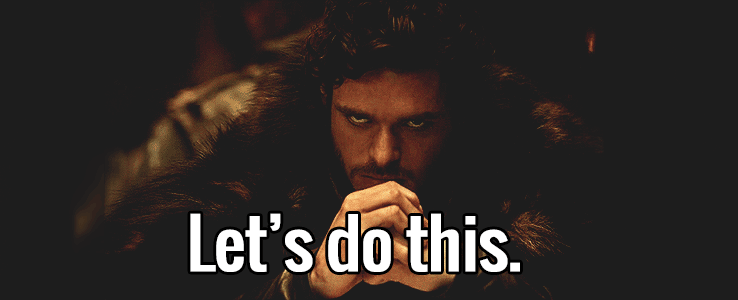

In this section, we will perform some indepth analysis on our datasets with the use of visualizations.

We will also look at ratings distribution of the data which will be illustrated using graphs.

First, Let us confirm the sizes of the datasets we are dealing with.

In [11]:
# Checking the shape of our datasets
a, b = movies_df.shape
c, d = imdb_df.shape
e, f = tags_df.shape
g, h = genomescores_df.shape
i, j = genometags_df.shape
k, l = train_df.shape

In [12]:
print(f'movies_df contains {a} rows and {b} columns')
print(f'imdb_df contains {c} rows and {d} columns')
print(f'tags_df contains {e} rows and {f} columns')
print(f'genomescores_df contains {g} rows and {h} columns')
print(f'genometags_df contains {i} rows and {j} columns')
print(f'train_df contains {k} rows and {l} columns')

movies_df contains 62423 rows and 3 columns
imdb_df contains 27278 rows and 6 columns
tags_df contains 1093360 rows and 4 columns
genomescores_df contains 15584448 rows and 3 columns
genometags_df contains 1128 rows and 2 columns
train_df contains 10000038 rows and 4 columns


Each of these datasetas have different number of observations. But these datasets can however be related to one another with the `movieId` feature which is found on all the datasets.     

`timestamp` column can be found in `tags_df` and `train_df` which isn't particularly useful for our recommendation algorithm building and the time a movie was being rated nothing to do with a user's preferences or the quality of a film. BUT, the timestamps could, however, provide some meaningful insights in our EDA

**Calculating our total number of users:** since the `train_df` has the highest number of observations, lets us use it to calculate our total number of users.

In [13]:
unique_users = len(train_df['userId'].unique().tolist())
print(f'The total number of users are {unique_users}')

The total number of users are 162541


In [14]:
unique_users = len(train_df['movieId'].unique().tolist())
print(f'The total number of movies are {unique_users}')

The total number of movies are 48213


Checking the lowest and highest ratings received.

In [15]:
# minimum and maximum ratings
min_rating = train_df.rating.min()
max_rating = train_df.rating.max()
print('Lowest rating: {}'.format(min_rating))
print('Highest rating: {}'.format(max_rating))

Lowest rating: 0.5
Highest rating: 5.0


Lets take a look at the distribution of these ratings.

In [16]:
# Creating a class distribution in a dataframe
ratings_dist = pd.DataFrame(list(train_df['rating'].value_counts()),
                          index=train_df['rating'].unique(),
                          columns=['Number of Rating'])

ratings_dist

,Number of Rating
4.0,2652977
4.5,1959759
5.0,1445230
2.0,1270642
3.0,880516
1.0,656821
3.5,505578
2.5,311213
0.5,159731
1.5,157571


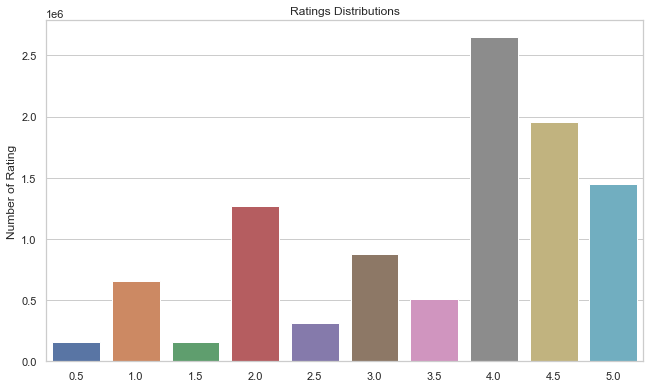

In [17]:
# Plot ratings distribution
sns.set(rc={'figure.figsize':(10.7,6.27)}, style="whitegrid")
sns.barplot(x=ratings_dist.index, y=ratings_dist['Number of Rating'])
sns.color_palette()
plt.title('Ratings Distributions');

In [18]:
print (f'Total Number of ratings in train_df: {train_df.shape[0]}')
print (f'Average rating in train_df: {np.mean(train_df["rating"])}')

Total Number of ratings in train_df: 10000038
Average rating in train_df: 3.5333951730983424


Lets clean up the `movies_df` features.

In [19]:
# Convert data types to strings for string handling
movies_df['title'] = movies_df.title.astype(str)
movies_df['genres'] = movies_df.genres.astype(str)

# Discarding the pipes between the genres 
movies_df['genres'] = movies_df['genres'].map(lambda x: x.lower().split('|'))
movies_df['genres'] = movies_df['genres'].apply(lambda x: " ".join(x))

# Extracting the release year from the titles
def get_release_dates(title):
    sub = title[-5:-1]
    year = int(sub) if sub.isdigit() else 9999    
    return year

# Creating the release year by extracting the release year from the movie title
movies_df['release_year'] = movies_df['title'].apply(get_release_dates)

# removing the year from the titles
movies_df['title'] = movies_df['title'].map(lambda x: str(x)[:-6])

In [20]:
movies_df.head()

,movieId,title,genres,release_year
0,1,Toy Story,adventure animation children comedy fantasy,1995
1,2,Jumanji,adventure children fantasy,1995
2,3,Grumpier Old Men,comedy romance,1995
3,4,Waiting to Exhale,comedy drama romance,1995
4,5,Father of the Bride Part II,comedy,1995


In [21]:
# adding movie titles to train_df
train_df = train_df.merge(movies_df[['movieId', 'title', 'genres']], on='movieId', how='left')

In [22]:
train_df.head()

,userId,movieId,rating,timestamp,title,genres
0,5163,57669,4.0,1518349992,In Bruges,comedy crime drama thriller
1,106343,5,4.5,1206238739,Father of the Bride Part II,comedy
2,146790,5459,5.0,1076215539,Men in Black II (a.k.a. MIIB) (a.k.a. MIB 2),action comedy sci-fi
3,106362,32296,2.0,1423042565,Miss Congeniality 2: Armed and Fabulous,adventure comedy crime
4,9041,366,3.0,833375837,Wes Craven's New Nightmare (Nightmare on Elm S...,drama horror mystery thriller


In [23]:
train_df.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
title        0
genres       0
dtype: int64

### Content-based Filtering

filtering based on `director` and `plot_keyword`.

In [24]:
# Convienient indexes to map between book titles and indexes of 
# the books dataframe
titles = movies_df['title']
indices = pd.Series(movies_df.index, index=movies_df['title'])

indices.head()

title
Toy Story                       0
Jumanji                         1
Grumpier Old Men                2
Waiting to Exhale               3
Father of the Bride Part II     4
dtype: int64

#### vectorizating our new feature

In [26]:
tf = TfidfVectorizer(analyzer='word', ngram_range=(1,2),
                     min_df=0, stop_words='english')

# Produce a feature matrix, where each row corresponds to a movie,
# with TF-IDF features as columns 
genres_vect = tf.fit_transform(movies_df['genres'])
genres_vect.shape

(62423, 191)

Let us check the similarity between each vector within our matrix. This is done by making use of the `cosine_similarity` function.

In [ ]:
def content_generate_top_N_recommendations(movie_title, N=10):
    # Convert the string book title to a numeric index for our 
    # similarity matrix
    b_idx = indices[movie_title]
    # Extract all similarity values computed with the reference book title
    sim_scores = list(enumerate(vect_cos_sim[b_idx]))
    # Sort the values, keeping a copy of the original index of each value
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    # Select the top-N values for recommendation
    sim_scores = sim_scores[1:N]
    # Collect indexes 
    movie_indices = [i[0] for i in sim_scores]
    # Convert the indexes back into titles 
    return titles.iloc[movie_indices]

In [ ]:
content_generate_top_N_recommendations("Toy Story (1995)", N=10)

In [ ]:
content_generate_top_N_recommendations("Wolf (1994)", N=10)

#### Rating Prediction  
We will create a function that will implement this algorithmic process.

In [ ]:
def content_generate_rating_estimate(movie_title, user, rating_data, k=20, threshold=0.0):
    # Convert the book title to a numeric index for our 
    # similarity matrix
    b_idx = indices[movie_title]
    neighbors = [] # <-- Stores our collection of similarity values 
     
    # Gather the similarity ratings between each book the user has rated
    # and the reference book 
    for index, row in rating_data[rating_data['userId']==user].iterrows():
        sim = vect_cos_sim[b_idx-1, indices[row['title']]-1]
        neighbors.append((sim, row['rating']))
    # Select the top-N values from our collection
    k_neighbors = heapq.nlargest(k, neighbors, key=lambda t: t[0])

    # Compute the weighted average using similarity scores and 
    # user item ratings. 
    simTotal, weightedSum = 0, 0
    for (simScore, rating) in k_neighbors:
        # Ensure that similarity ratings are above a given threshold
        if (simScore > threshold):
            simTotal += simScore
            weightedSum += simScore * rating
    try:
        predictedRating = weightedSum / simTotal
    except ZeroDivisionError:
        # Cold-start problem - No ratings given by user. 
        # We use the average rating for the reference item as a proxy in this case 
        predictedRating = np.mean(rating_data[rating_data['title']==movie_title]['rating'])
    return predictedRating

In [ ]:
# Subset of ratings from user 1000
train_df[train_df['userId'] == 1000][3:10]

Generating prediction from an already rated movie by user 1000

In [ ]:
title = "Sixteen Candles (1984)"
actual_rating = train_df[(train_df['userId'] == 1000) & (train_df['title'] == title)]['rating'].values[0]
pred_rating = content_generate_rating_estimate(movie_title=title, user=1000, rating_data=train_df)
print (f"Title - {title}")
print ("---")
print (f"Actual rating: \t\t {actual_rating}")
print (f"Predicted rating: \t {pred_rating}")

In [ ]:
title = "Lost Highway (1997)"
actual_rating = train_df[(train_df['userId'] == 1000) & (train_df['title'] == title)]['rating'].values[0]
pred_rating = content_generate_rating_estimate(movie_title=title, user=1000, rating_data=train_df)
print (f"Title - {title}")
print ("---")
print (f"Actual rating: \t\t {actual_rating}")
print (f"Predicted rating: \t {pred_rating}")